# <span style="font-family:cursive;text-align:center">Wild Blueberry Yield Prediction :</span>

# <span style="font-family:cursive;text-align:center">⬇️ Importing Libraries</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import dabl

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn

import missingno as msno
import shap
import optuna
import joblib

import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive;text-align:center">⬇️ Importing Data</span>

In [2]:
df = pd.read_csv('C:/Users/santh/Downloads/WildBlueberryPollinationSimulationData.csv')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <font size='5pt'><b>Features Unit Description:</b></font>

Clonesize - The average blueberry clone size in the field

Honeybee - Honeybee density in the field
    
Bumbles - Bumblebee density in the field
    

Andrena - Andrena bee density in the field

Osmia - Osmia bee density in the field

MaxOfUpperTRange - ℃ The highest record of the upper band daily air temperature during the bloom season

MinOfUpperTRange - ℃ The lowest record of the upper band daily air temperature

AverageOfUpperTRange - ℃ The average of the upper band daily air temperature

MaxOfLowerTRange - ℃ The highest record of the lower band daily air temperature

MinOfLowerTRange - ℃ The lowest record of the lower band daily air temperature

AverageOfLowerTRange - ℃ The average of the lower band daily air temperature

RainingDays -  The total number of days during the bloom season, each of which has precipitation larger than zero

AverageRainingDays -  The average of raining days of the entire bloom season 
    
    
<br>
<font size='5pt'><b>Target</b></font><br>
    
    
yield: The target feature is yield of the Field which is a continuous variable

In [3]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

Dataset contains 777 rows and 18 columns


In [4]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [5]:
#converted all columns to lowecase :

df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   maxofuppertrange      777 non-null    float64
 7   minofuppertrange      777 non-null    float64
 8   averageofuppertrange  777 non-null    float64
 9   maxoflowertrange      777 non-null    float64
 10  minoflowertrange      777 non-null    float64
 11  averageoflowertrange  777 non-null    float64
 12  rainingdays           777 non-null    float64
 13  averagerainingdays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [7]:
df.describe()

,row#,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [8]:
#Checking Duplicates :

print(df.duplicated().sum())

0


In [9]:
# Checking for missing values

df.isna().sum()

row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
maxofuppertrange        0
minofuppertrange        0
averageofuppertrange    0
maxoflowertrange        0
minoflowertrange        0
averageoflowertrange    0
rainingdays             0
averagerainingdays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There are No Missing Values in the Dataset

In [10]:
#unique value in Each columns:

for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].nunique(),'\n')

Unique value in row#:
777 

Unique value in clonesize:
6 

Unique value in honeybee:
7 

Unique value in bumbles:
10 

Unique value in andrena:
12 

Unique value in osmia:
12 

Unique value in maxofuppertrange:
5 

Unique value in minofuppertrange:
5 

Unique value in averageofuppertrange:
5 

Unique value in maxoflowertrange:
5 

Unique value in minoflowertrange:
5 

Unique value in averageoflowertrange:
5 

Unique value in rainingdays:
5 

Unique value in averagerainingdays:
5 

Unique value in fruitset:
777 

Unique value in fruitmass:
777 

Unique value in seeds:
777 

Unique value in yield:
777 



In [11]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in row#:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

[3813.165795 4947.605663 3866.798965 4303.94303  3436.493543 2825.003738
 2625.269164 2379.905214 4234.868585 5356.871861 4057.555205 3941.255122
 4768.594369 3720.711588 3900.344042 3387.785165 2688.028831 2508.375673
 1945.530615 4310.625398 4830.959809 3911.422247 4051.551293 3837.512961
 3269.271761 4503.161856 5126.993178 4248.355054 4476.811464 3662.183125
 2988.05944  3049.260316 2384.728916 4898.835857 5831.7066   4334.841218
 5246.521458 4356.945873 3822.981667 3182.698648 4870.625368 5739.924933
 4546.786741 5360.873908 4045.479657 3385.364224 3385.148001 2452.680747
 5221.357411 6318.708722 4705.626533 5996.078548 6691.043218 5501.878077
 6010.760082 4999.156215 3968.330182 3784.119353 3139.432546 6125.695384
 7041.380179 5876.960007 6244.195761 5556.372277 5086.609905 5482.081299
 4247.508926 6578.235221 7267.28344  5746.777027 6564.958302 5347.718939
 4350.42467  4177.015203 3496.352359 7016.89385  7570.48492  6198.064956
 6801.323934 6030.980735 5728.748277 5647.712261 46

In [12]:
#Since there are many Columns grouping them into categories for Easirer Exploration :

target = ['yield']

bees_cols = ['honeybee', 'bumbles', 'andrena', 'osmia']

min_max_range = ['maxofuppertrange', 'minofuppertrange', 'averageofuppertrange',
                   'maxoflowertrange', 'minoflowertrange', 'averageoflowertrange',
                   'rainingdays', 'averagerainingdays']

fruit_characteristics_cols = ['fruitset', 'fruitmass', 'seeds']

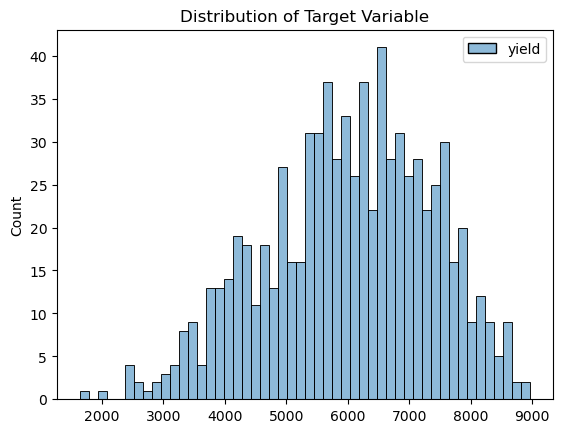

In [13]:
#Checking for the distribution of Target Variable :

sns.histplot(df[target], bins = 50)
plt.title('Distribution of Target Variable')
plt.show()

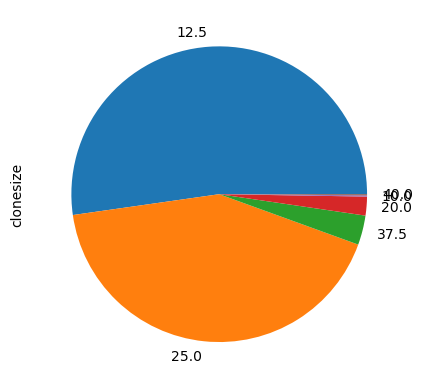

In [14]:
fig, ax = plt.subplots()
df['clonesize'].value_counts().plot(kind='pie', ax=ax)
plt.show()

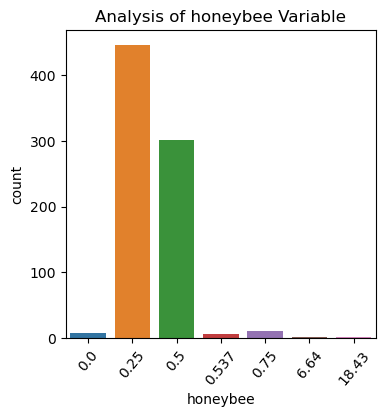

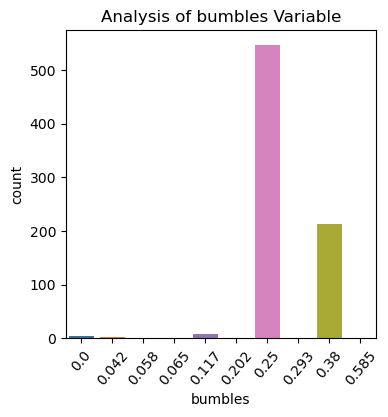

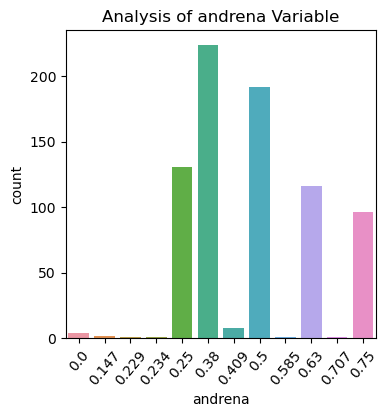

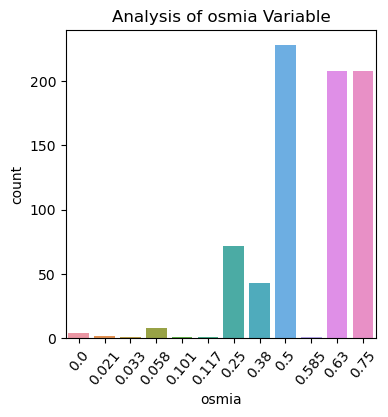

In [15]:
#Analysis of Bees columns:

for col in bees_cols:
    fig, ax = plt.subplots(figsize=(4,4))
    sns.countplot(df[col])
    plt.title(f'Analysis of {col} Variable')
    plt.xticks(rotation=50)
    plt.show()
    

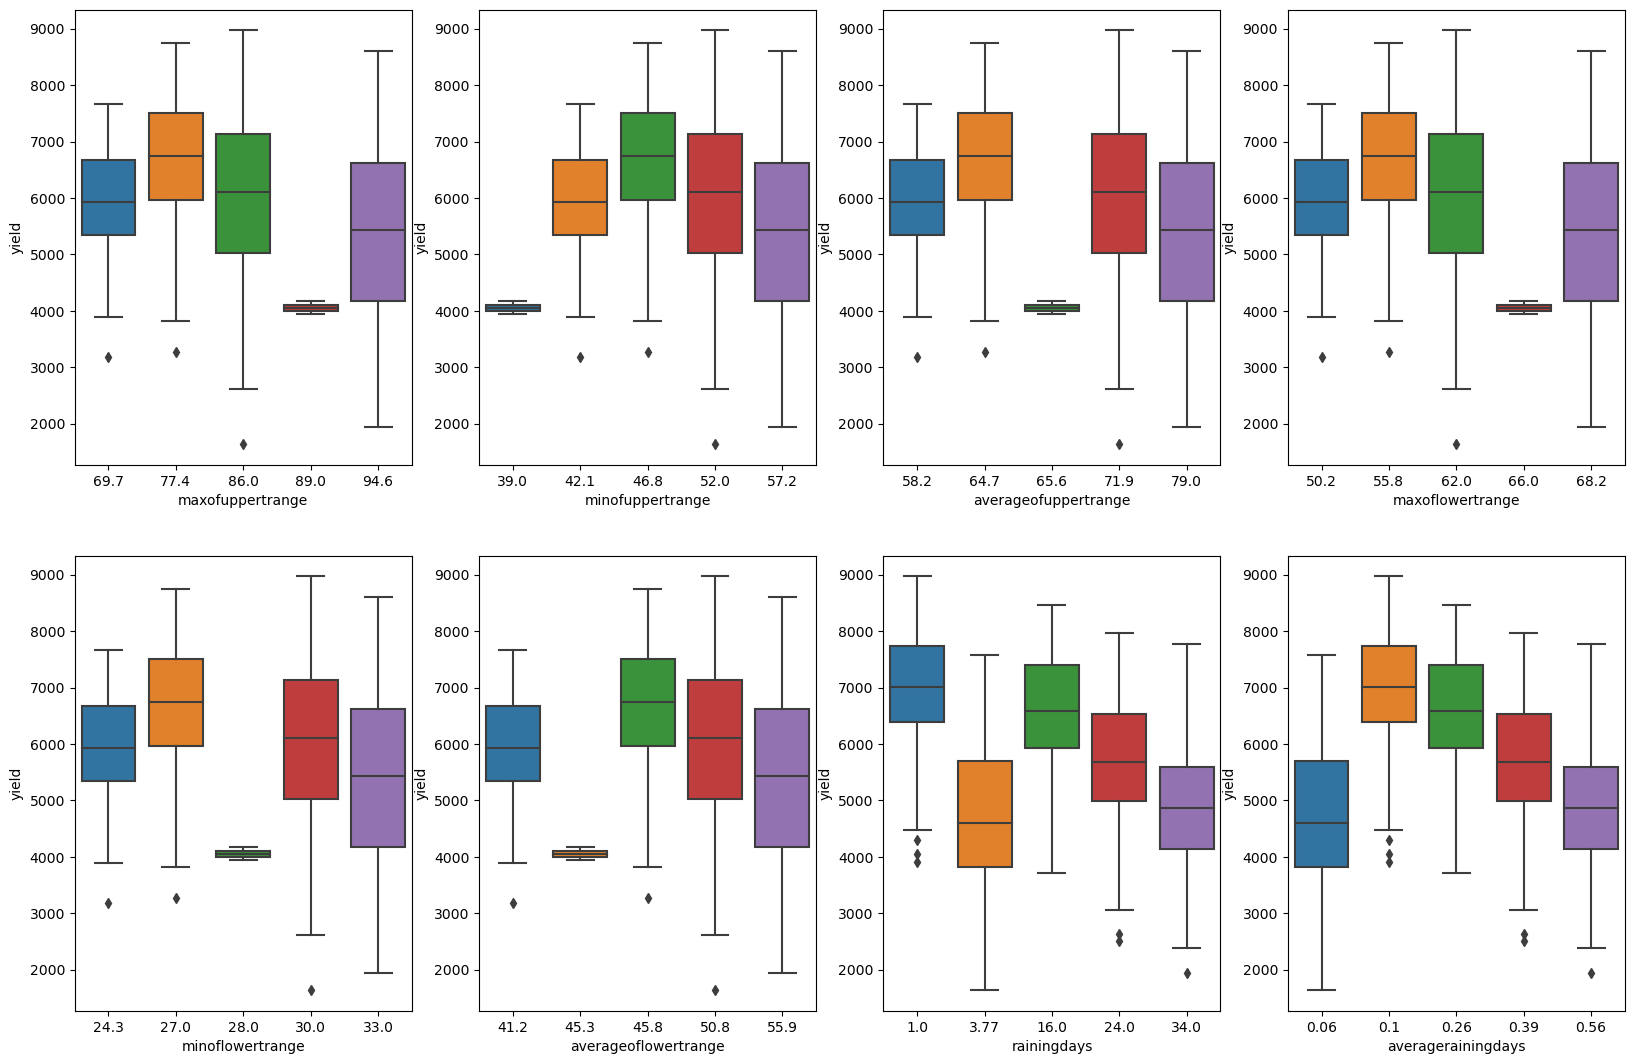

In [16]:
#Analysis of Min_Max of temperature Columns :
    
fig, ax = plt.subplots(2,4, figsize=(20,13))
for e, col in enumerate(df[min_max_range]):
    if e<=3:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[0,e])
    else:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[1,e-4])       
plt.show()

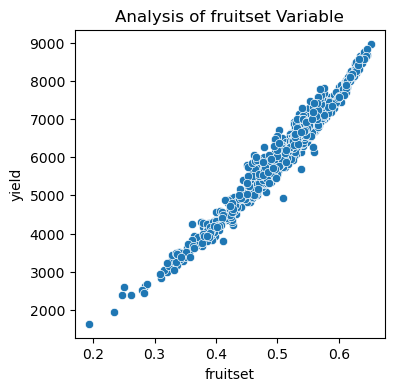

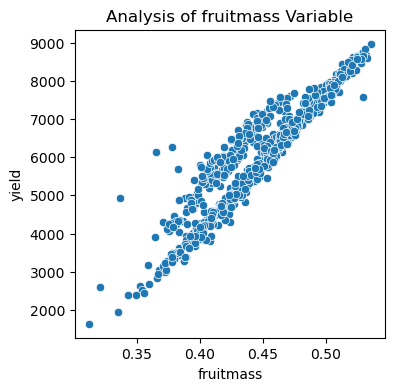

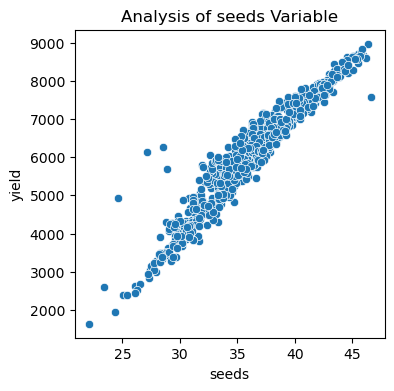

In [17]:
for col in fruit_characteristics_cols:
    fig, ax = plt.subplots(figsize=(4,4))
    sns.scatterplot(x=col, y='yield', data=df)
    plt.title(f'Analysis of {col} Variable')
    plt.show()

Observations :

* `fruitset`,`fruitmass`,`seeds` columns have more co-relation with the yield,
* 12.5 & 25.0 are the most used size for cloning berries,
* Dataset does not have any Missing values,
* Dataset is completely with numerical variables & no categorical variables. 

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

### Checking for Missing Values :

In [18]:
# Function to calculate missing values and the columns :

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


###  Checking for Multi-Collinearity :

In [20]:
# Remove the response variable from the data
variance = df.drop(['row#'], axis=1)

# Compute the variance inflation factor (VIF) for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(variance.values, i) for i in range(variance.shape[1])]
vif["features"] = variance.columns

# Print the results
print(vif.sort_values)

<bound method DataFrame.sort_values of       VIF Factor              features
0   3.999566e+00             clonesize
1   3.640635e+00              honeybee
2   2.245488e+00               bumbles
3   1.493120e+00               andrena
4   2.458605e+00                 osmia
5            inf      maxofuppertrange
6            inf      minofuppertrange
7   9.596756e+07  averageofuppertrange
8            inf      maxoflowertrange
9            inf      minoflowertrange
10  4.927027e+07  averageoflowertrange
11  6.412429e+01           rainingdays
12  7.264213e+01    averagerainingdays
13  1.139384e+02              fruitset
14  8.426046e+02             fruitmass
15  7.239807e+02                 seeds
16  1.220717e+02                 yield>


We could see there aren't considerable amount of columns with higher VIF,So we can rule out Multi-collinearity Factor

In [21]:
df_copy = df.drop(['yield','row#'], axis=1)
target = df['yield']

In [22]:
# Calculating Relations Between Features and Target :

mi_score = mutual_info_regression(df_copy, target, n_neighbors=3,random_state=42)
mi_score = pd.DataFrame({'columns':df_copy.columns, 'MI_score':mi_score})
mi_score.sort_values(by='MI_score', ascending=False)

,columns,MI_score
13,fruitset,1.948853
15,seeds,1.664007
14,fruitmass,1.588506
12,averagerainingdays,0.217232
11,rainingdays,0.215965
0,clonesize,0.182163
5,maxofuppertrange,0.125941
6,minofuppertrange,0.125599
8,maxoflowertrange,0.124477
10,averageoflowertrange,0.123369


# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

In [23]:
#train-test split :

X_train,X_test,y_train,y_test = train_test_split(df_copy,target,test_size=0.3,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(543, 16) (234, 16) (543,) (234,)


In [24]:
#XgBoost Regressor:

xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE for XGB = {rmse_xgb}')

RMSE for XGB = 145.5605161742259


In [25]:
#Random Forest Regressor:

rf = RandomForestRegressor(random_state=1, max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE for Random Forest = {rmse_rf}')

RMSE for Random Forest = 151.48475608332723


In [26]:
#Ridge Regression :

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Ridge Regression model
ridge = Ridge(alpha=1.0) # Set regularization strength with alpha
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_scaled)

rmse_ridge_model = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE for Ridge Regression = {rmse_ridge_model}')

RMSE for Ridge Regression = 127.09297080866135


In [27]:
# Gradient Boosting Regression model

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

rmse_gb_model = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE for Gradient Boosting Regression model = {rmse_gb_model}')

RMSE for Gradient Boosting Regression model = 130.43712265746007


# <span style="font-family:cursive;text-align:center">Basic Models Evaluation</span>

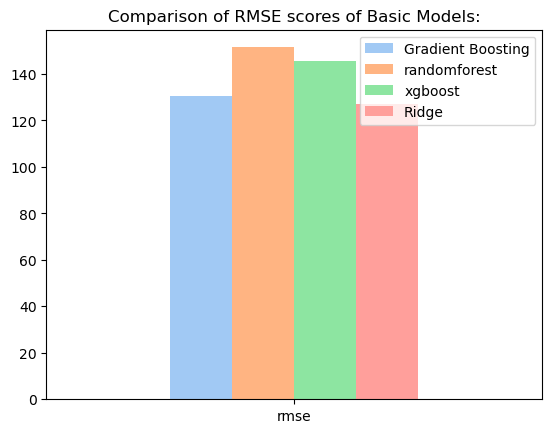

In [28]:
error_rec = {
    "Gradient Boosting": {
        "rmse": rmse_gb_model,
    },
    "randomforest": {
        "rmse": rmse_rf,
    },
    "xgboost": {
        "rmse": rmse_xgb,
    },
    "Ridge": {
        "rmse": rmse_ridge_model,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3],
                 sns.color_palette("pastel")[4]]);

plt.title("Comparison of RMSE scores of Basic Models:")
plt.xticks(rotation=0)
plt.show()

# <span style="font-family:cursive;text-align:center">Hyperparameter Tuning :</span>

In [29]:
kf = KFold(n_splits = 10, shuffle=True, random_state=0)

param_grid = {'n_estimators': [100,200,400,500,800],
             'learning_rate': [0.1,0.05,0.3,0.7],
             'min_samples_split': [2,4],
             'min_samples_leaf': [0.1,0.4],
             'max_depth': [3,4,7]
             }

estimator = GradientBoostingRegressor(random_state=42)

clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kf, 
                   scoring='neg_mean_squared_error', n_jobs=-1)
clf.fit(X_train,y_train)

best_estim = clf.best_estimator_
best_score = clf.best_score_
best_param = clf.best_params_
print("Best Estimator:", best_estim)
print("Best score:", np.sqrt(-best_score))

Best Estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=7, min_samples_leaf=0.1,
                          n_estimators=800, random_state=42)
Best score: 199.89120609667637


In [30]:
# Training and Evaluating Gradient Boosting Regression Tuned model:

gb_tuned = GradientBoostingRegressor(n_estimators=800, learning_rate=0.05,max_depth=7, min_samples_leaf=0.1, random_state=42)
gb_tuned.fit(X_train, y_train)

y_pred = gb_tuned.predict(X_test)

rmse_gb_tuned_model = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'RMSE for Gradient Boosting Regression model = {rmse_gb_tuned_model}')
print(f"MAPE: {mape} %")

RMSE for Gradient Boosting Regression model = 170.01828036388628
MAPE: 2.4041604904074494 %


Text(0.5, 0, 'iteration')

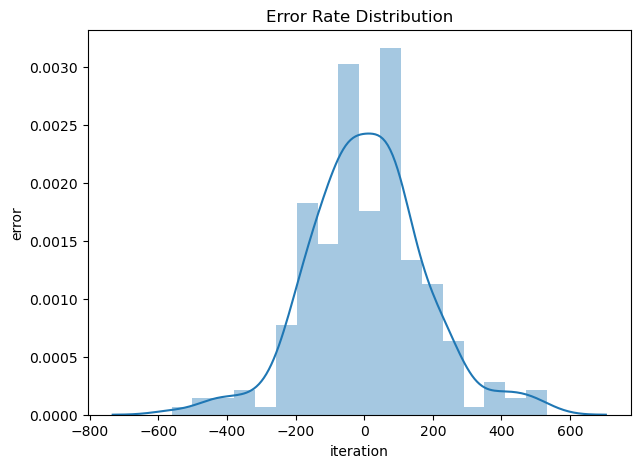

In [31]:
y_hat_tuned = gb_tuned.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

In [32]:
gb_tuned.feature_importances_

array([1.17390081e-03, 7.26788505e-04, 1.60157067e-03, 1.65722856e-03,
       1.14184263e-02, 8.94699667e-04, 1.69887023e-03, 1.35471933e-03,
       1.49226808e-03, 2.05589165e-03, 2.25370428e-03, 5.81320517e-03,
       3.81670059e-03, 8.31429423e-01, 1.41067823e-02, 1.18505821e-01])

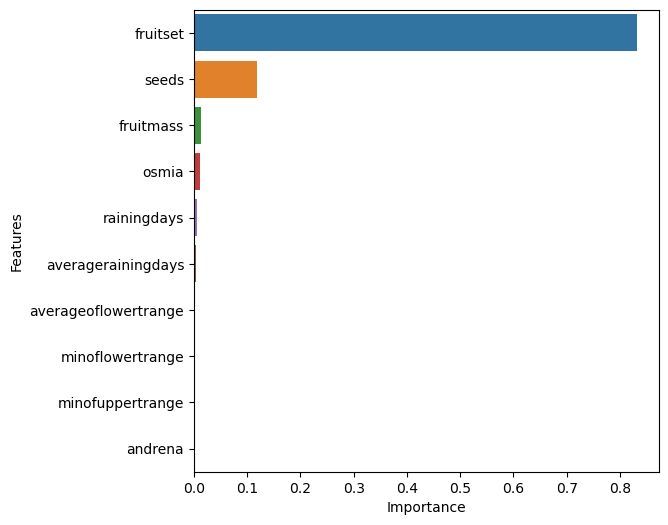

In [33]:
df_importance = pd.DataFrame()
df_importance['Features'] = X_train.columns
df_importance['Importance'] = gb_tuned.feature_importances_

# Get the top 10 rows of the DataFrame, sorted by the Importance column
top10_features = df_importance.nlargest(10, 'Importance')

# Plot the bar plot
plt.figure(figsize=(6, 6))
sns.barplot(data = top10_features, y='Features', x='Importance');

In [43]:
top_features = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top_features

['fruitset',
 'seeds',
 'fruitmass',
 'osmia',
 'rainingdays',
 'averagerainingdays',
 'averageoflowertrange',
 'minoflowertrange',
 'minofuppertrange',
 'andrena']

In [44]:
df_top_features = df[top_features]
df_top_features.head()

,fruitset,seeds,fruitmass,osmia,rainingdays,averagerainingdays,averageoflowertrange,minoflowertrange,minofuppertrange,andrena
0,0.410652,31.678898,0.408159,0.25,16.0,0.26,50.8,30.0,52.0,0.25
1,0.444254,33.449385,0.425458,0.25,1.0,0.10,50.8,30.0,52.0,0.25
2,0.383787,30.546306,0.399172,0.25,16.0,0.26,55.9,33.0,57.2,0.25
3,0.407564,31.562586,0.408789,0.25,1.0,0.10,55.9,33.0,57.2,0.25
4,0.354413,28.873714,0.382703,0.25,24.0,0.39,50.8,30.0,52.0,0.25


In [45]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top_features, target, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(543, 10) (234, 10) (543,) (234,)


In [46]:
gb_tuned.fit(X_train_new, y_train_new)

y_pred_new = gb_tuned.predict(X_test_new)

rmse_final = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
print(f'RMSE for Final Model = {rmse_final}')

RMSE for Final Model = 193.05571029506928


In [47]:
y_test_new.head()

568    4282.700632
530    6801.492050
610    6279.338501
109    6898.390949
586    7004.015537
Name: yield, dtype: float64

In [48]:
test = X_test_new.loc[568]
test = test.values.reshape(1,-1)
test

array([[ 0.38895631, 29.28433587,  0.37688016,  0.5       , 34.        ,
         0.56      , 41.2       , 24.3       , 42.1       ,  0.63      ]])

In [50]:
pred = gb_tuned.predict(test)

print(f"The predicted EUI is:  {pred[0]}")

The predicted EUI is:  4066.087838990873


In [59]:
#Saving Model :

with open('gb_yield_prediction_model.joblib', 'wb') as f:
    joblib.dump(gb_tuned, f, compress=1)

In [178]:
#Loading the Model :

with open('gb_yield_prediction_model.joblib', 'rb') as f:
        gb_tuned_loaded = joblib.load(f)
        
prediction = gb_tuned_loaded.predict(X_test)

rmse_loaded = np.sqrt(mean_squared_error(y_test,prediction))

print(rmse_loaded)

170.01828036388628


# <span style="font-family:cursive;text-align:center">Explainable AI</span>

In [51]:
shap.initjs()
sample_data = X_train_new.sample(100)
explainer = shap.TreeExplainer(gb_tuned)
shap_values = explainer.shap_values(sample_data)

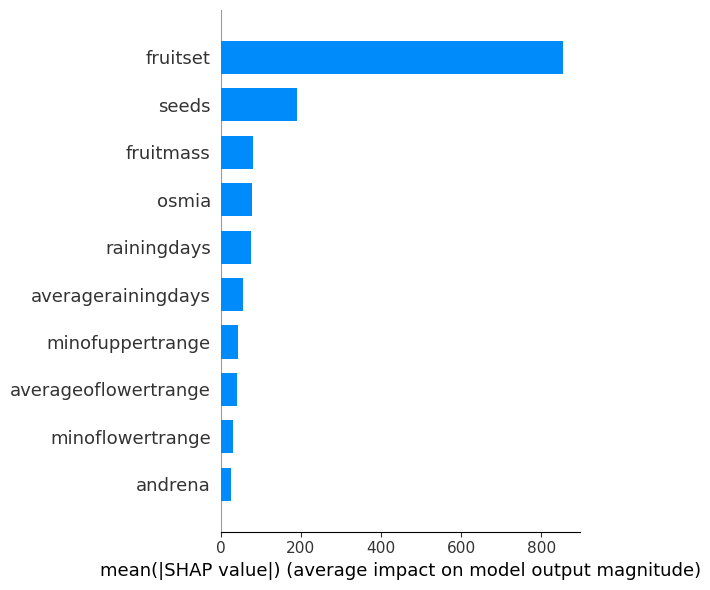

In [52]:
shap.summary_plot(shap_values, sample_data, plot_type="bar",plot_size=[6,6])

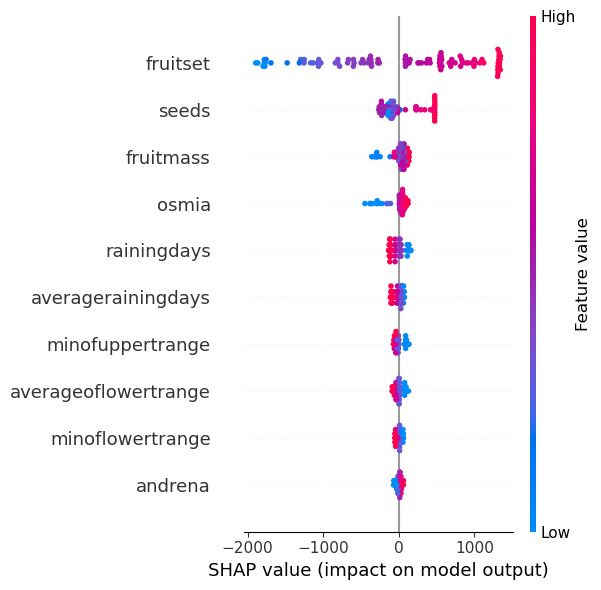

In [53]:
shap.summary_plot(shap_values, sample_data,plot_size=[6,6])

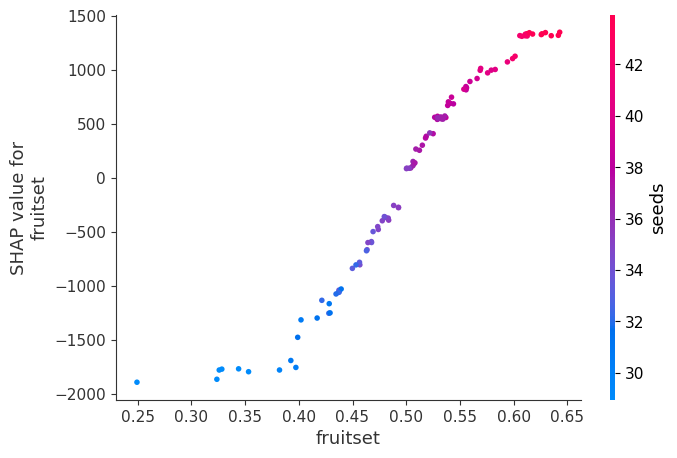

In [58]:
shap.dependence_plot('fruitset', shap_values, sample_data,show=False)

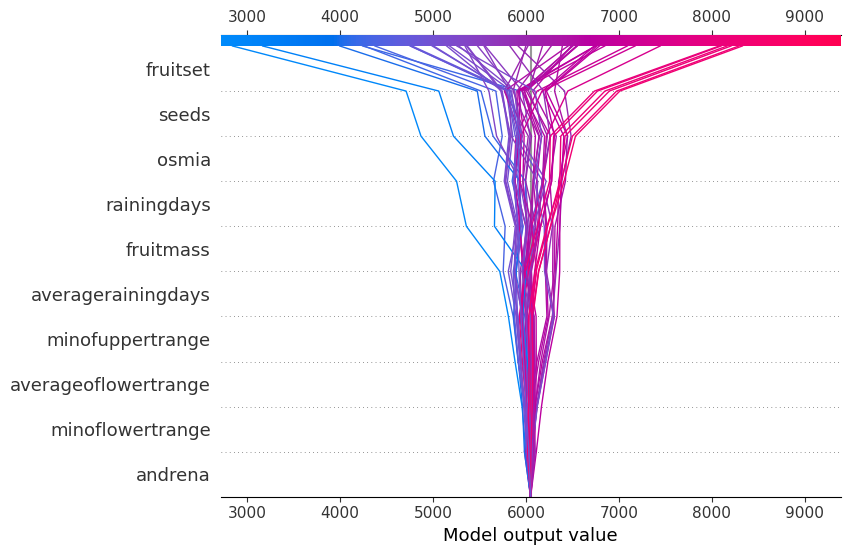

In [55]:
shap.decision_plot(shap.TreeExplainer(gb_tuned).expected_value[0], 
                   shap_values[50:100], 
                   feature_names=sample_data.columns.tolist(),show=False
                  )
plt.gcf().set_size_inches(8,6)
plt.show()

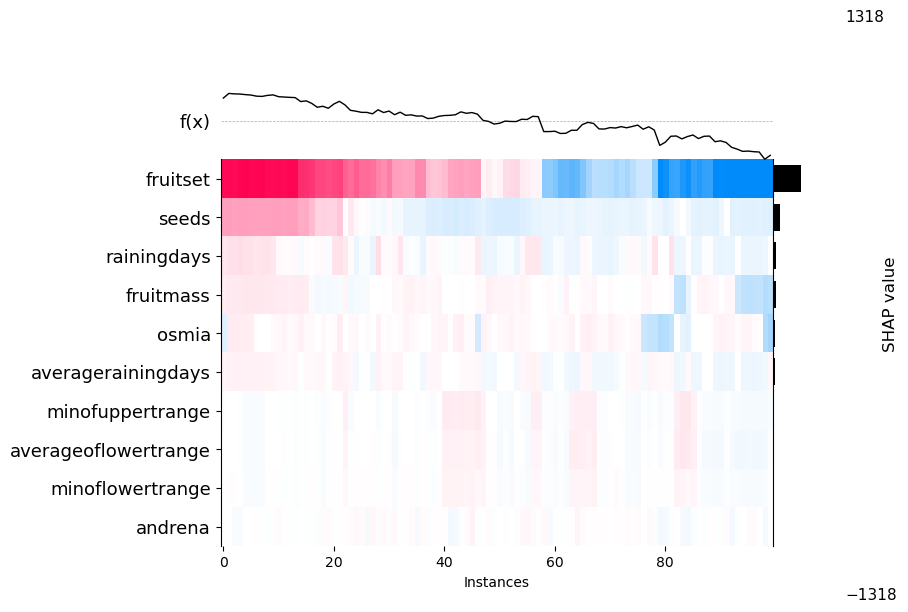

In [56]:
limit = 500
shap.plots.heatmap(shap.TreeExplainer(gb_tuned, data=sample_data)(sample_data[:limit]), max_display=15)

# <span style="font-family:cursive;text-align:center">Conclusions :</span>

* Base Gradient Boosting Regressor Model showed better results,
* Tuned Gradient Boosting with Grid Search CV,
* Fruitset column seems to be influencing the Model more than any other Features,
* Obtained RMSE score of `170` which is a MAPE of `2.4%`